In [7]:
import sys
sys.path.append('../')
import os
import jax.numpy as jnp
import matplotlib.pyplot as plt
import e3nn_jax as e3nn
import chex
from src import spectra
import plotly.graph_objects as go
from tqdm import tqdm

In [8]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
cutoffs = {"radial": spectra.radial_cutoff(radius=3.2),
           "voronoi": spectra.voronoi_cutoff(),
           "min_dist": spectra.min_dist_cutoff(),
           "chemenv_simplest": spectra.chemenv_cutoff(strategy='simplest'),
           "chemenv_multi": spectra.chemenv_cutoff(strategy='multi_weights'),
           "crystalnn": spectra.crystalnn_cutoff()
}

local_envs = {cutoff_name: [] for cutoff_name in cutoffs}

cif_file_dir = "../cifs/icsd_samples/"
cif_files = os.listdir(cif_file_dir)
bispectrum = spectra.Spectra(lmax=4, order=2)
for cif_file in tqdm(cif_files[:24]):
    bispectrum.load_cif(os.path.join(cif_file_dir, cif_file))
    structure = bispectrum.get_structure()
    for cutoff_name, cutoff_function in cutoffs.items():
        print(cif_file, cutoff_name)
        bispectrum.set_cutoff(cutoff_function)
        for index in range(len(structure)):
            if bispectrum.get_site_element(index) in ["H", "He", "Li", "Be", "B", "C", "N", "O", "F", "Ne", "Na", "Mg", "Al", "Si", "P", "S", "Cl", "Ar"]:
                continue
            local_env = bispectrum.get_local_neighbors(index)
            local_envs[cutoff_name].append((cif_file, index, {neighbor.index for neighbor in local_env}))

  0%|          | 0/24 [00:00<?, ?it/s]/Users/tphung/Dropbox (MIT)/repos/pyspectra/venv/lib/python3.11/site-packages/pymatgen/io/cif.py:1186: UserWarning: The default value of primitive was changed from True to False in https://github.com/materialsproject/pymatgen/pull/3419. CifParser now returns the cell in the CIF file as is. If you want the primitive cell, please set primitive=True explicitly.
  warnings.warn(


Fe2O3_14.cif radial
Fe2O3_14.cif voronoi
Fe2O3_14.cif min_dist
Fe2O3_14.cif chemenv_simplest
Fe2O3_14.cif chemenv_multi


  4%|▍         | 1/24 [00:03<01:23,  3.61s/it]

Fe2O3_14.cif crystalnn
((CH3)2N)SC(NH2)_61.cif radial
((CH3)2N)SC(NH2)_61.cif voronoi
((CH3)2N)SC(NH2)_61.cif min_dist
((CH3)2N)SC(NH2)_61.cif chemenv_simplest
((CH3)2N)SC(NH2)_61.cif chemenv_multi
((CH3)2N)SC(NH2)_61.cif crystalnn
Bi6(Bi0.32Fe0.68)(PO4)4O4_2.cif radial
Bi6(Bi0.32Fe0.68)(PO4)4O4_2.cif voronoi
Bi6(Bi0.32Fe0.68)(PO4)4O4_2.cif min_dist
Bi6(Bi0.32Fe0.68)(PO4)4O4_2.cif chemenv_simplest
Bi6(Bi0.32Fe0.68)(PO4)4O4_2.cif chemenv_multi


 12%|█▎        | 3/24 [00:10<01:09,  3.32s/it]

Bi6(Bi0.32Fe0.68)(PO4)4O4_2.cif crystalnn
AuDy_221.cif radial
AuDy_221.cif voronoi
AuDy_221.cif min_dist
AuDy_221.cif chemenv_simplest


 17%|█▋        | 4/24 [00:10<00:46,  2.30s/it]

AuDy_221.cif chemenv_multi
AuDy_221.cif crystalnn
Cu(Cu0.07Mn1.93)O4_227.cif radial
Cu(Cu0.07Mn1.93)O4_227.cif voronoi
Cu(Cu0.07Mn1.93)O4_227.cif min_dist
Cu(Cu0.07Mn1.93)O4_227.cif chemenv_simplest
Cu(Cu0.07Mn1.93)O4_227.cif chemenv_multi
Cu(Cu0.07Mn1.93)O4_227.cif crystalnn


 21%|██        | 5/24 [00:18<01:17,  4.09s/it]/Users/tphung/Dropbox (MIT)/repos/pyspectra/venv/lib/python3.11/site-packages/pymatgen/io/cif.py:1219: UserWarning: Issues encountered while parsing CIF: 4 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


Y(Si0.92Ni0.08)2_191.cif radial
Y(Si0.92Ni0.08)2_191.cif voronoi
Y(Si0.92Ni0.08)2_191.cif min_dist
Y(Si0.92Ni0.08)2_191.cif chemenv_simplest
Y(Si0.92Ni0.08)2_191.cif chemenv_multi


 25%|██▌       | 6/24 [00:18<00:53,  2.96s/it]

Y(Si0.92Ni0.08)2_191.cif crystalnn
Sr9La(PO4)5(SiO4)O_176.cif radial
Sr9La(PO4)5(SiO4)O_176.cif voronoi
Sr9La(PO4)5(SiO4)O_176.cif min_dist


/Users/tphung/Dropbox (MIT)/repos/pyspectra/venv/lib/python3.11/site-packages/pymatgen/io/cif.py:1016: UserWarning: Some occupancies ([1.0, 1.0, 1.0003, 1.0, 1.0, 1.0, 0.5]) sum to > 1! If they are within the occupancy_tolerance, they will be rescaled. The current occupancy_tolerance is set to: 1000
  warnings.warn(msg)
/Users/tphung/Dropbox (MIT)/repos/pyspectra/venv/lib/python3.11/site-packages/pymatgen/io/cif.py:1219: UserWarning: Issues encountered while parsing CIF: 4 fractional coordinates rounded to ideal values to avoid issues with finite precision.
Some occupancies ([1.0, 1.0, 1.0003, 1.0, 1.0, 1.0, 0.5]) sum to > 1! If they are within the occupancy_tolerance, they will be rescaled. The current occupancy_tolerance is set to: 1000
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


Sr9La(PO4)5(SiO4)O_176.cif chemenv_simplest
Sr9La(PO4)5(SiO4)O_176.cif chemenv_multi


 29%|██▉       | 7/24 [00:26<01:14,  4.36s/it]

Sr9La(PO4)5(SiO4)O_176.cif crystalnn
SrPrCuS3_62.cif radial
SrPrCuS3_62.cif voronoi
SrPrCuS3_62.cif min_dist
SrPrCuS3_62.cif chemenv_simplest
SrPrCuS3_62.cif chemenv_multi


 33%|███▎      | 8/24 [00:33<01:23,  5.19s/it]

SrPrCuS3_62.cif crystalnn
Hg0.764Pb0.191Ba2Ca3Cu4O10.14_123.cif radial
Hg0.764Pb0.191Ba2Ca3Cu4O10.14_123.cif voronoi
Hg0.764Pb0.191Ba2Ca3Cu4O10.14_123.cif min_dist
Hg0.764Pb0.191Ba2Ca3Cu4O10.14_123.cif chemenv_simplest
Hg0.764Pb0.191Ba2Ca3Cu4O10.14_123.cif chemenv_multi


 38%|███▊      | 9/24 [00:37<01:11,  4.80s/it]

Hg0.764Pb0.191Ba2Ca3Cu4O10.14_123.cif crystalnn
(Y0.95Ca0.05)(Ba1.9Nd0.1)Cu3O7_47.cif radial
(Y0.95Ca0.05)(Ba1.9Nd0.1)Cu3O7_47.cif voronoi
(Y0.95Ca0.05)(Ba1.9Nd0.1)Cu3O7_47.cif min_dist
(Y0.95Ca0.05)(Ba1.9Nd0.1)Cu3O7_47.cif chemenv_simplest
(Y0.95Ca0.05)(Ba1.9Nd0.1)Cu3O7_47.cif chemenv_multi


 42%|████▏     | 10/24 [00:38<00:52,  3.72s/it]

(Y0.95Ca0.05)(Ba1.9Nd0.1)Cu3O7_47.cif crystalnn
Mn3Ge5_118.cif radial
Mn3Ge5_118.cif voronoi
Mn3Ge5_118.cif min_dist
Mn3Ge5_118.cif chemenv_simplest
Mn3Ge5_118.cif chemenv_multi
Mn3Ge5_118.cif crystalnn


 46%|████▌     | 11/24 [01:01<02:04,  9.54s/it]

NdCu3(Ru3Ti)O12_204.cif radial
NdCu3(Ru3Ti)O12_204.cif voronoi
NdCu3(Ru3Ti)O12_204.cif min_dist
NdCu3(Ru3Ti)O12_204.cif chemenv_simplest
NdCu3(Ru3Ti)O12_204.cif chemenv_multi


 50%|█████     | 12/24 [01:06<01:40,  8.35s/it]

NdCu3(Ru3Ti)O12_204.cif crystalnn
UTe1.87_129.cif radial
UTe1.87_129.cif voronoi
UTe1.87_129.cif min_dist
UTe1.87_129.cif chemenv_simplest
UTe1.87_129.cif chemenv_multi


 54%|█████▍    | 13/24 [01:08<01:10,  6.37s/it]

UTe1.87_129.cif crystalnn
Ba4Bi1.84(Fe2Nb8O30)_100.cif radial
Ba4Bi1.84(Fe2Nb8O30)_100.cif voronoi
Ba4Bi1.84(Fe2Nb8O30)_100.cif min_dist
Ba4Bi1.84(Fe2Nb8O30)_100.cif chemenv_simplest
Ba4Bi1.84(Fe2Nb8O30)_100.cif chemenv_multi


 58%|█████▊    | 14/24 [01:13<00:58,  5.87s/it]

Ba4Bi1.84(Fe2Nb8O30)_100.cif crystalnn
K3(Ga0.97Cr0.03)F6_225.cif radial
K3(Ga0.97Cr0.03)F6_225.cif voronoi
K3(Ga0.97Cr0.03)F6_225.cif min_dist
K3(Ga0.97Cr0.03)F6_225.cif chemenv_simplest
K3(Ga0.97Cr0.03)F6_225.cif chemenv_multi


 62%|██████▎   | 15/24 [01:17<00:48,  5.41s/it]

K3(Ga0.97Cr0.03)F6_225.cif crystalnn
NaZn2(Zn0.6Mg0.4)H2(AsO4)3_15.cif radial
NaZn2(Zn0.6Mg0.4)H2(AsO4)3_15.cif voronoi
NaZn2(Zn0.6Mg0.4)H2(AsO4)3_15.cif min_dist
NaZn2(Zn0.6Mg0.4)H2(AsO4)3_15.cif chemenv_simplest
NaZn2(Zn0.6Mg0.4)H2(AsO4)3_15.cif chemenv_multi
NaZn2(Zn0.6Mg0.4)H2(AsO4)3_15.cif crystalnn


 67%|██████▋   | 16/24 [01:23<00:45,  5.68s/it]

K(Mg3AlSi3O10)F2_12.cif radial
K(Mg3AlSi3O10)F2_12.cif voronoi
K(Mg3AlSi3O10)F2_12.cif min_dist
K(Mg3AlSi3O10)F2_12.cif chemenv_simplest
K(Mg3AlSi3O10)F2_12.cif chemenv_multi


 71%|███████   | 17/24 [01:24<00:29,  4.21s/it]

K(Mg3AlSi3O10)F2_12.cif crystalnn
TbFe6Ge3.5Ga2.5_65.cif radial
TbFe6Ge3.5Ga2.5_65.cif voronoi


/Users/tphung/Dropbox (MIT)/repos/pyspectra/venv/lib/python3.11/site-packages/pymatgen/io/cif.py:1219: UserWarning: Issues encountered while parsing CIF: 3 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


TbFe6Ge3.5Ga2.5_65.cif min_dist
TbFe6Ge3.5Ga2.5_65.cif chemenv_simplest
TbFe6Ge3.5Ga2.5_65.cif chemenv_multi
TbFe6Ge3.5Ga2.5_65.cif crystalnn


 75%|███████▌  | 18/24 [02:17<01:52, 18.79s/it]

AgBi(CrO4)2_82.cif radial
AgBi(CrO4)2_82.cif voronoi
AgBi(CrO4)2_82.cif min_dist
AgBi(CrO4)2_82.cif chemenv_simplest
AgBi(CrO4)2_82.cif chemenv_multi


 79%|███████▉  | 19/24 [02:20<01:09, 13.95s/it]

AgBi(CrO4)2_82.cif crystalnn
CaNi2As2_139.cif radial
CaNi2As2_139.cif voronoi
CaNi2As2_139.cif min_dist
CaNi2As2_139.cif chemenv_simplest
CaNi2As2_139.cif chemenv_multi


/Users/tphung/Dropbox (MIT)/repos/pyspectra/venv/lib/python3.11/site-packages/pymatgen/analysis/chemenv/coordination_environments/chemenv_strategies.py:2642: RuntimeWarning: invalid value encountered in scalar divide
  nb_sets_fractions = {cn_map: w_nb_set / w_nb_sets_total for cn_map, w_nb_set in w_nb_sets.items()}
 83%|████████▎ | 20/24 [02:25<00:45, 11.29s/it]

CaNi2As2_139.cif crystalnn
C18H12Cl9Ga3N6_29.cif radial
C18H12Cl9Ga3N6_29.cif voronoi
C18H12Cl9Ga3N6_29.cif min_dist
C18H12Cl9Ga3N6_29.cif chemenv_simplest
C18H12Cl9Ga3N6_29.cif chemenv_multi
C18H12Cl9Ga3N6_29.cif crystalnn


 88%|████████▊ | 21/24 [02:34<00:31, 10.59s/it]

HfGa2_141.cif radial
HfGa2_141.cif voronoi
HfGa2_141.cif min_dist
HfGa2_141.cif chemenv_simplest
HfGa2_141.cif chemenv_multi


 92%|█████████▏| 22/24 [02:41<00:19,  9.71s/it]

HfGa2_141.cif crystalnn
ZrRhGa_189.cif radial
ZrRhGa_189.cif voronoi


/Users/tphung/Dropbox (MIT)/repos/pyspectra/venv/lib/python3.11/site-packages/pymatgen/io/cif.py:1219: UserWarning: Issues encountered while parsing CIF: 2 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


ZrRhGa_189.cif min_dist
ZrRhGa_189.cif chemenv_simplest
ZrRhGa_189.cif chemenv_multi


 96%|█████████▌| 23/24 [02:44<00:07,  7.69s/it]

ZrRhGa_189.cif crystalnn
W1.75Ru1.25B2_58.cif radial
W1.75Ru1.25B2_58.cif voronoi
W1.75Ru1.25B2_58.cif min_dist
W1.75Ru1.25B2_58.cif chemenv_simplest
W1.75Ru1.25B2_58.cif chemenv_multi


100%|██████████| 24/24 [02:52<00:00,  7.17s/it]

W1.75Ru1.25B2_58.cif crystalnn


Li2PtSb_216.cif crystalnn
C65H143CuMo6N5O26_5.cif radial
C65H143CuMo6N5O26_5.cif voronoi
C65H143CuMo6N5O26_5.cif min_dist
C65H143CuMo6N5O26_5.cif chemenv_simplest

In [36]:
local_envs[list(local_envs.keys())[0]]

[('Fe2O3_14.cif', 0, {4, 5, 6, 7, 9, 11, 13, 15, 16, 17, 18, 19}),
 ('Fe2O3_14.cif', 1, {4, 5, 6, 7, 8, 10, 12, 14, 16, 17, 18, 19}),
 ('Fe2O3_14.cif', 2, {4, 5, 6, 7, 8, 10, 12, 14, 16, 17, 18, 19}),
 ('Fe2O3_14.cif', 3, {4, 5, 6, 7, 9, 11, 13, 15, 16, 17, 18, 19}),
 ('Fe2O3_14.cif', 4, {0, 1, 2, 3, 8, 9, 10, 12, 13, 15, 16, 17}),
 ('Fe2O3_14.cif', 5, {0, 1, 2, 3, 8, 9, 11, 12, 13, 14, 16, 17}),
 ('Fe2O3_14.cif', 6, {0, 1, 2, 3, 8, 10, 11, 13, 14, 15, 18, 19}),
 ('Fe2O3_14.cif', 7, {0, 1, 2, 3, 9, 10, 11, 12, 14, 15, 18, 19}),
 ('Fe2O3_14.cif', 8, {1, 2, 4, 5, 6, 10, 12, 13, 14, 16, 17, 18, 19}),
 ('Fe2O3_14.cif', 9, {0, 3, 4, 5, 7, 11, 12, 13, 15, 16, 17, 18, 19}),
 ('Fe2O3_14.cif', 10, {1, 2, 4, 6, 7, 8, 12, 14, 15, 16, 17, 18, 19}),
 ('Fe2O3_14.cif', 11, {0, 3, 5, 6, 7, 9, 13, 14, 15, 16, 17, 18, 19}),
 ('Fe2O3_14.cif', 12, {1, 2, 4, 5, 7, 8, 9, 10, 14, 16, 17, 18, 19}),
 ('Fe2O3_14.cif', 13, {0, 3, 4, 5, 6, 8, 9, 11, 15, 16, 17, 18, 19}),
 ('Fe2O3_14.cif', 14, {1, 2, 5, 6, 7, 8, 1

In [70]:
import numpy as np

diff_nums = np.zeros((len(cutoffs), len(cutoffs)))
diff_strs = {}
total_local_envs = len(local_envs[list(cutoffs.keys())[0]])

for i in range(len(cutoffs)):
    for j in range(len(cutoffs)):
        if i < j:
            for index, local_env in enumerate(local_envs[list(local_envs.keys())[i]]):                
                if local_env[2] != local_envs[list(cutoffs.keys())[j]][index][2]:
                    diff_nums[i, j] += 1
                    if (i, j) not in diff_strs:
                        diff_strs[(i, j)] = []
                    cif_file = local_env[0]
                    index = local_env[1]
                    diff_strs[(i, j)].append((cif_file, index))

In [71]:
print(total_local_envs)

351


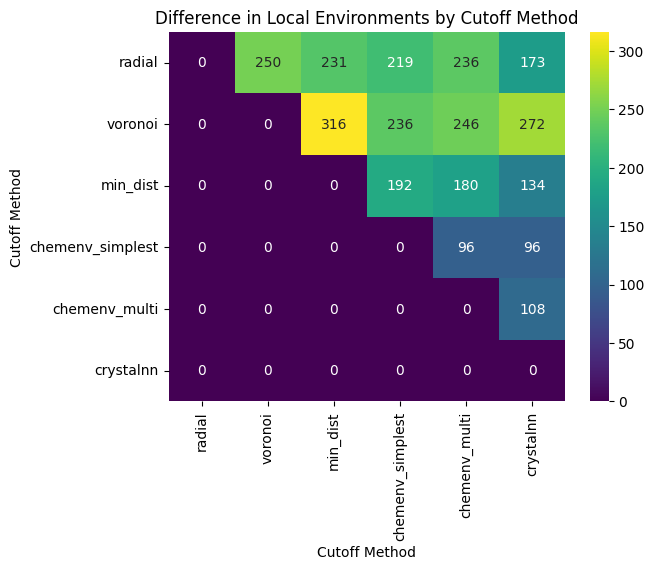

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

cutoff_method_labels = list(cutoffs.keys())
sns.heatmap(diff_nums, annot=True, fmt="g", cmap='viridis', xticklabels=cutoff_method_labels, yticklabels=cutoff_method_labels)
plt.xlabel('Cutoff Method')
plt.ylabel('Cutoff Method')
plt.title('Difference in Local Environments by Cutoff Method')
plt.show()

In [78]:
local_envs['crystalnn']

[('Fe2O3_14.cif', 0, {9, 11, 13, 15, 16, 18}),
 ('Fe2O3_14.cif', 1, {8, 10, 12, 14, 17, 19}),
 ('Fe2O3_14.cif', 2, {8, 10, 12, 14, 16, 18}),
 ('Fe2O3_14.cif', 3, {9, 11, 13, 15, 17, 19}),
 ('Fe2O3_14.cif', 4, {8, 9, 10, 12, 13, 15, 16, 17}),
 ('Fe2O3_14.cif', 5, {8, 9, 11, 12, 13, 14, 16, 17}),
 ('Fe2O3_14.cif', 6, {8, 10, 11, 13, 14, 15, 18, 19}),
 ('Fe2O3_14.cif', 7, {9, 10, 11, 12, 14, 15, 18, 19}),
 ('Bi6(Bi0.32Fe0.68)(PO4)4O4_2.cif', 0, {9}),
 ('Bi6(Bi0.32Fe0.68)(PO4)4O4_2.cif', 1, {8}),
 ('Bi6(Bi0.32Fe0.68)(PO4)4O4_2.cif', 2, {17, 20, 26, 28, 33}),
 ('Bi6(Bi0.32Fe0.68)(PO4)4O4_2.cif', 3, {16, 21, 27, 29, 32}),
 ('Bi6(Bi0.32Fe0.68)(PO4)4O4_2.cif', 4, {14, 18, 20, 21, 22, 24, 25, 27, 33}),
 ('Bi6(Bi0.32Fe0.68)(PO4)4O4_2.cif', 5, {15, 19, 20, 21, 23, 24, 25, 26, 32}),
 ('Bi6(Bi0.32Fe0.68)(PO4)4O4_2.cif', 6, {17, 18, 22, 26, 27, 28, 30, 31}),
 ('Bi6(Bi0.32Fe0.68)(PO4)4O4_2.cif', 7, {16, 19, 23, 26, 27, 29, 30, 31}),
 ('Bi6(Bi0.32Fe0.68)(PO4)4O4_2.cif', 8, {1, 9}),
 ('Bi6(Bi0.32Fe0.68

In [80]:
bispectrum.load_cif("../cifs/icsd_samples/Fe2O3_14.cif")

/Users/tphung/Dropbox (MIT)/repos/pyspectra/venv/lib/python3.11/site-packages/pymatgen/io/cif.py:1186: UserWarning: The default value of primitive was changed from True to False in https://github.com/materialsproject/pymatgen/pull/3419. CifParser now returns the cell in the CIF file as is. If you want the primitive cell, please set primitive=True explicitly.
  warnings.warn(


In [81]:
structure = bispectrum.get_structure()
structure[4]

PeriodicSite: Fe3 (Fe3+) (1.061, 0.4094, 5.303) [0.2777, 0.0828, 0.7495]